## Locally Weighted Linear Regression (LWLR):

Locally Weighted Linear Regression (LWLR), also called **Locally Weighted Least Squares**, is a non-parametric algorithm that fits a **linear model around a query point** using nearby data points, weighted by distance.

Unlike ordinary linear regression (which fits a global θ), LWLR fits a new θ for **each query point**, using a weighted least squares objective.




In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a synthetic dataset:
X = np.linspace(-3,3,100)
y = np.sin(X) + 0.1 * np.random.rand(100)

# Adding a bias term - intercept
X_b = np.c_[np.ones_like(X), X]



## Math behind:

We still use a linear hypothesis:

$
h_\theta(x) = \theta^T x
$

But θ is now computed *locally* for each test point.

We assign a **weight** to each training point based on its distance from the query point $ x^{(query)} $:

$
w^{(i)} = \exp\left( -\frac{(x^{(i)} - x^{(query)})^T (x^{(i)} - x^{(query)})}{2\tau^2} \right)
$

- $ \tau $ is the **bandwidth parameter** — smaller τ means more local weighting.
- This is a **Gaussian kernel** centered at $ x^{(query)} $.



We minimize the **weighted squared error**:

$
J(\theta) = \sum_{i=1}^{n} w^{(i)} \left( y^{(i)} - \theta^T x^{(i)} \right)^2
$

In matrix form:

$
J(\theta) = (X\theta - y)^T W (X\theta - y)
$

Where:
- $ X \in \mathbb{R}^{n \times d} $: design matrix (with bias term),
- $ y \in \mathbb{R}^{n} $: target vector,
- $ W \in \mathbb{R}^{n \times n} $: diagonal matrix of weights $ w^{(i)} $

---


$
\theta = (X^T W X)^{-1} X^T W y
$

This θ is computed **separately for each query point**, using weights centered at that point.


Once you compute $ \theta $, the prediction at the query point $ x^{(query)} $ is:

$
\hat{y}^{(query)} = \theta^T x^{(query)}
$


In [7]:
def lwlr(x_query, X_train, y_train, tau):
    """
    Perform Locally Weighted Linear Regression for a single query point.

    Args:
        x_query: shape (2,), query point (including bias)
        X_train: shape (n_samples, 2), input data with bias
        y_train: shape (n_samples,), targets
        tau: bandwidth parameter (controls weight decay)

    Returns:
        prediction at x_query
    """

    diff = X_train - x_query
    norms = np.sum(diff**2, axis = 1)
    weights = np.exp(-norms / (2* tau**2))

    W = np.diag(weights)
    theta = np.linalg.pinv(X_train.T @ W @ X_train)  @ X_train.T @ W @y_train

    return x_query @ theta

In [8]:
def predict_lwlr(X_query, X_train, y_train, tau):
    return np.array([lwlr(x_q, X_train, y_train, tau) for x_q in X_query])

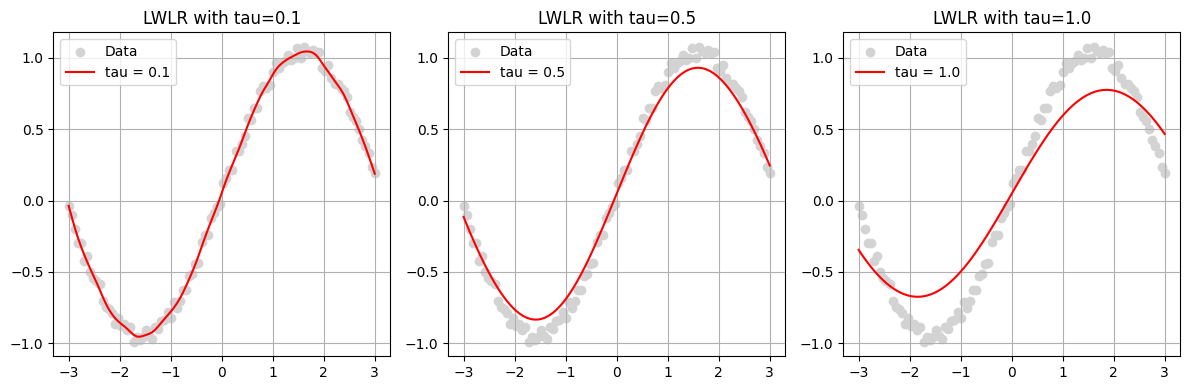

In [9]:
# Try with a few different tau values
taus = [0.1, 0.5, 1.0]

plt.figure(figsize=(12, 4))
for i, tau in enumerate(taus):
    y_pred = predict_lwlr(X_b, X_b, y, tau)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, label='Data', color='lightgray')
    plt.plot(X, y_pred, color='red', label=f'tau = {tau}')
    plt.title(f'LWLR with tau={tau}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



The **bandwidth τ** controls how local the fit is:
- Small τ → very local, more flexible but prone to overfitting.
- Large τ → more global, smoother but may underfit.